# Biomedical Data Science HW2
## BME4760

## Loading Data
Loading of .csv is done through pandas. (OPTIONAL) The option displays were to view the entirety of the tables which was a 195 x 24.

In [3]:
import pandas as pd
df = pd.read_csv("data.csv")
#pd.options.display.max_rows=200
#pd.options.display.max_columns=200

In [4]:
df.shape
#df.shape

(195, 24)

In [5]:
X = df.loc[:,'MDVP:Fo(Hz)':'PPE'].values
y = df.loc[:,'status'].values
print(X.shape)
print(y.shape)

(195, 22)
(195,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                    test_size=0.20,
                    stratify=y,
                    random_state=4760)

In [556]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (156, 22)
y_train shape:  (156,)
X_test shape:  (39, 22)
y_test shape:  (39,)


In [557]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier())

In [569]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [ 34 106], Acc: 0.875
Fold:  2, Class dist.: [ 34 106], Acc: 0.875
Fold:  3, Class dist.: [ 34 106], Acc: 0.812
Fold:  4, Class dist.: [ 34 106], Acc: 0.750
Fold:  5, Class dist.: [ 34 106], Acc: 0.875
Fold:  6, Class dist.: [ 34 106], Acc: 0.938
Fold:  7, Class dist.: [ 34 106], Acc: 1.000
Fold:  8, Class dist.: [ 34 106], Acc: 0.875
Fold:  9, Class dist.: [ 35 107], Acc: 0.857
Fold: 10, Class dist.: [ 35 107], Acc: 0.929

CV accuracy: 0.879 +/- 0.065


# Building a 🅿ℹ🅿€lℹ₦€👌💯💯💯💯

In [570]:
from sklearn.grid_search import GridSearchCV

k_range = [4,5,6,7,8,9,10]
param_grid = [{'kneighborsclassifier__n_neighbors':k_range}]

grid = GridSearchCV(estimator=pipe_lr, param_grid = param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.9038461538461539
{'kneighborsclassifier__n_neighbors': 9}


In [571]:
clf = grid.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.2f 👏💋🌹🤣🤣🤣🤣🤣🤣🤣🤣' % clf.score(X_test, y_test))

Test accuracy: 0.85 👏💋🌹🤣🤣🤣🤣🤣🤣🤣🤣


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform'))])

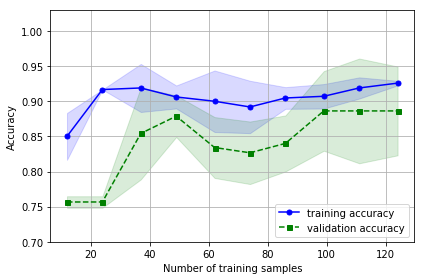

None


In [572]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                              X=X_train,
                              y=y_train,
                              train_sizes=np.linspace(0.1,1.0,10),
                              cv=5,
                              n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
print(plt.show())

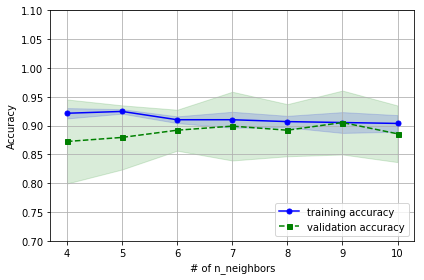

In [573]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
                estimator=pipe_lr,
                X=X_train,
                y=y_train,
                param_name='kneighborsclassifier__n_neighbors',
                param_range=k_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('# of n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.1])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

🔥🔥Big Data🔥🔥